In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def read(indir):
    df = pd.read_csv(os.path.join(indir, "losses.txt"), sep="\t", header=0)
    df["dropout"] = list(zip(df["distribution"].str.split("_").str[1], df["distribution"].str.split("_").apply(len) == 3))
    df["model"] = df["distribution"]
    df["model"] = df["model"].str.replace("static", "baseline")
    df["distribution"] = df["model"].str.split("_").str[0]
    df = df.set_index("model").sort_index()
    df["n_genes"] = df.index.str.split("_").str[1].str[1:].astype(int)
    return df

def plot(df, var, path=None, figsize=(6,4), dpi=150, legend=False):
    f, ax = plt.subplots(figsize=figsize, dpi=dpi)
    sns.lineplot(
        df,
        x="n_genes",
        y=var,
        hue="distribution",
        marker="o",
        ax=ax,
        legend=legend
    )
    ax.set_xlabel("Number of genes")
    ax.set_ylabel(var.upper())
    if legend:
        leg = plt.legend(bbox_to_anchor=(0.5, 1.1), loc="upper center", borderaxespad=0.0, ncols=5)
        for line in leg.get_lines():
            line.set_linewidth(3.0)

    if path is not None:
        plt.savefig(path, bbox_inches='tight')

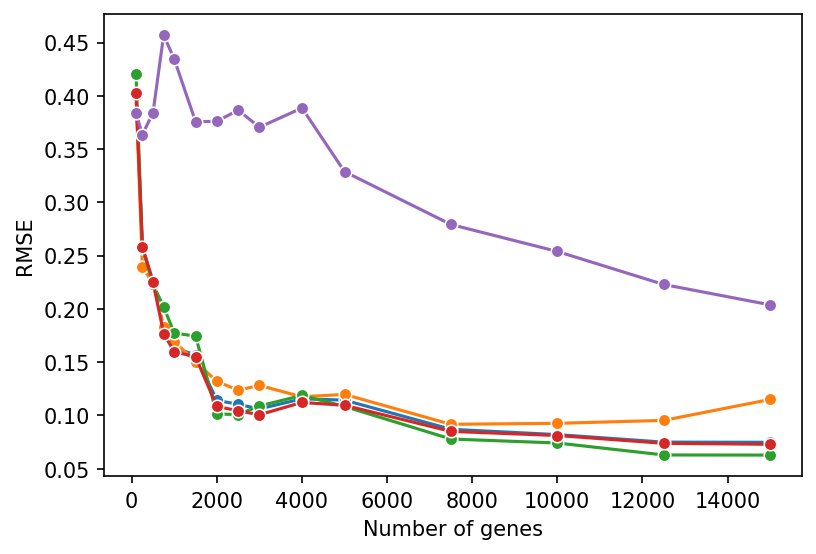

In [3]:
df = read("top_ngenes_xin")
plot(df, "rmse", "figures/ngenes/top_ngenes_xin.pdf")

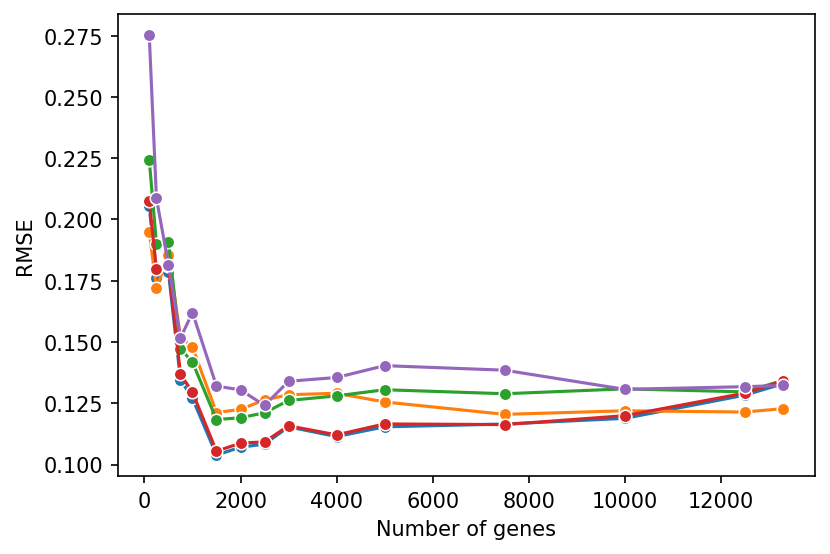

In [11]:
df = read("top_ngenes_pbmc")
plot(df, "rmse", "figures/ngenes/top_ngenes_pbmc.pdf")#, legend=True, figsize=(8,6), dpi=250)

In [6]:
df

,distribution,ref_nll_loss,deconv_nll_loss,rmse,mad,r,dropout,n_genes
model,,,,,,,,
baseline_n10000_0,baseline,350298.25000,2.282745e+09,0.088999,0.064319,0.950577,"(n10000, True)",10000
baseline_n10000_1,baseline,350298.25000,2.208916e+09,0.204296,0.151752,0.643930,"(n10000, True)",10000
baseline_n10000_10,baseline,350298.25000,2.117007e+09,0.091478,0.067403,0.946333,"(n10000, True)",10000
baseline_n10000_11,baseline,350298.25000,2.175477e+09,0.088492,0.062481,0.944797,"(n10000, True)",10000
baseline_n10000_12,baseline,350298.25000,2.315144e+09,0.205668,0.153168,0.630891,"(n10000, True)",10000
...,...,...,...,...,...,...,...,...
nb_n750_5,nb,30200.53125,1.893612e+06,0.341507,0.241027,0.276776,"(n750, True)",750
nb_n750_6,nb,30200.53125,1.721971e+06,0.347013,0.264490,0.187936,"(n750, True)",750
nb_n750_7,nb,30200.53125,1.787641e+06,0.310795,0.210796,0.442621,"(n750, True)",750


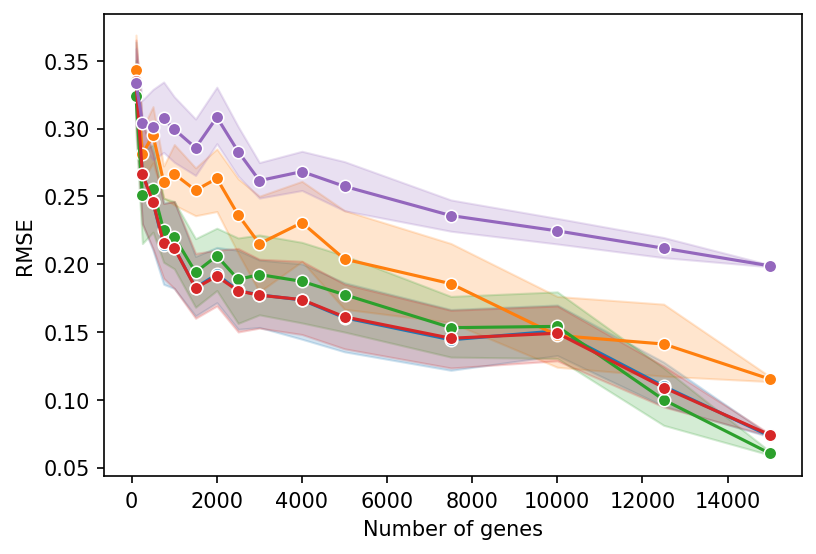

In [9]:
df = read("ngenes_xin")
plot(df, "rmse", "figures/ngenes/ngenes_xin.pdf")

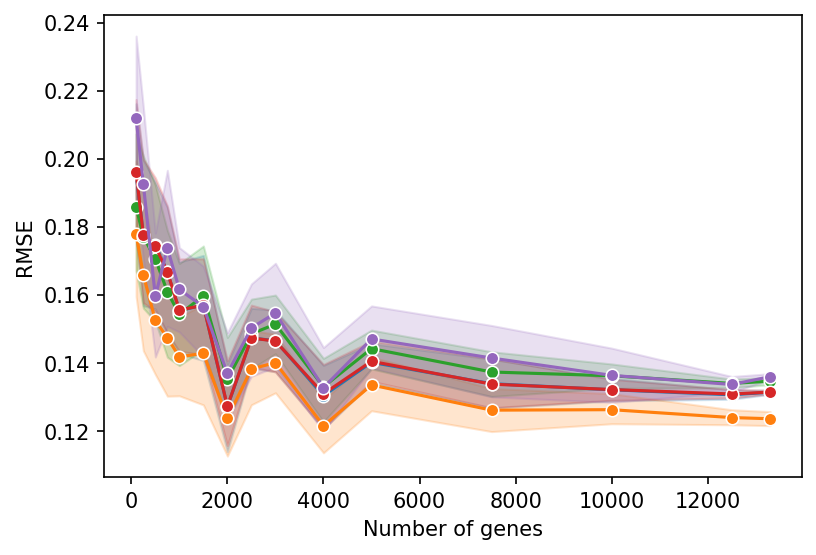

In [7]:
df = read("ngenes_pbmc")
plot(df, "rmse", "figures/ngenes/ngenes_pbmc.pdf")